In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture

from aptree import APTree

In [3]:
mnist = pd.read_csv("__data/mnist_train.csv")

In [4]:
X = mnist.iloc[:, 1:].to_numpy()
y = mnist.iloc[:, 0].to_numpy()

In [13]:
tree = APTree(leaf_max_size=6000)
labels_aptree = tree.fit_predict(X)

In [6]:
kmeans = KMeans(n_clusters=10, random_state=0)
labels_kmeans = kmeans.fit_predict(X)

In [7]:
aggl_clustering = AgglomerativeClustering(n_clusters=10)
labels_aggl = aggl_clustering.fit_predict(X)

In [8]:
dbscan = DBSCAN(eps=5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

In [9]:
gmm = GaussianMixture(n_components=10, random_state=0)
labels_gmm = gmm.fit_predict(X)

In [10]:
spectral = SpectralClustering(
    n_clusters=10, random_state=0, affinity="nearest_neighbors"
)
labels_spectral = spectral.fit_predict(X)

In [11]:
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)

In [12]:
def evaluate_clustering(X, labels):
    """
    Returns (silhouette, calinski_harabasz, davies_bouldin)
    or (np.nan, np.nan, np.nan) if not applicable.
    """
    labels = np.asarray(labels)

    # Remove noise points (for DBSCAN-like outputs)
    mask = labels != -1
    X_f = X[mask]
    labels_f = labels[mask]

    # Need at least 2 clusters
    if len(np.unique(labels_f)) < 2:
        return np.nan, np.nan, np.nan

    sil = silhouette_score(X_f, labels_f)
    ch = calinski_harabasz_score(X_f, labels_f)
    db = davies_bouldin_score(X_f, labels_f)

    return sil, ch, db


results = []

clusterings = {
    "APTree": labels_aptree,
    "KMeans": labels_kmeans,
    "Agglomerative": labels_aggl,
    "DBSCAN": labels_dbscan,
    "GMM": labels_gmm,
    "Spectral": labels_spectral,
}

for name, labels in clusterings.items():
    sil, ch, db = evaluate_clustering(X, labels)
    results.append(
        {
            "algorithm": name,
            "n_clusters": len(set(labels)) - (1 if -1 in labels else 0),
            "silhouette": sil,
            "calinski_harabasz": ch,
            "davies_bouldin": db,
        }
    )

df_results = pd.DataFrame(results)
df_results

,algorithm,n_clusters,silhouette,calinski_harabasz,davies_bouldin
0,APTree,24,-0.045955,283.352042,7.850930
1,KMeans,10,0.072039,2251.891012,2.913468
2,Agglomerative,10,0.024095,1898.082255,3.182257
3,DBSCAN,0,NaN,NaN,NaN
4,GMM,10,-0.017807,854.970293,5.261784
5,Spectral,10,0.022301,1946.055077,2.935491


In [ ]:
sil, ch, db = evaluate_clustering(X, labels_aptree)
results.append(
    {
        "algorithm": "APTree",
        "n_clusters": len(set(labels_aptree)) - (1 if -1 in labels_aptree else 0),
        "silhouette": sil,
        "calinski_harabasz": ch,
        "davies_bouldin": db,
    }
)

df_results = pd.DataFrame(results[1:])

In [14]:
df_results.to_csv("clustering_results.csv", index=False)

In [9]:
from umap import UMAP

/home/jmw/.cache/pypoetry/virtualenvs/prodr-4ysjpIas-py3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
reducer = UMAP()

In [11]:
Z = reducer.fit_transform(X)

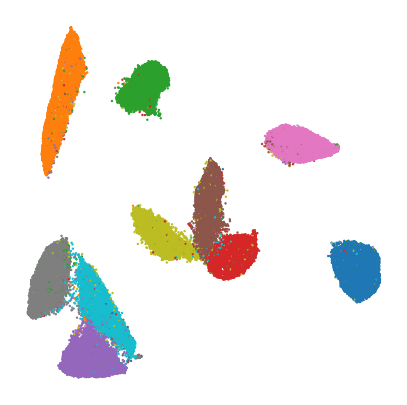

In [14]:
plt.figure(figsize=(5, 5))
plt.scatter(Z[:, 0], Z[:, 1], c=y, cmap="tab10", s=0.5)
plt.axis("off")
plt.show()

In [25]:
colors = [
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
]

In [35]:
print("Depth of Leaf Nodes:", [len(node.data_indices) for node in clusters])

Depth of Leaf Nodes: [1046, 1458, 1025, 1262, 1327, 1024, 1099, 1024, 1087, 1130, 1795, 1647, 1127, 1059, 1144, 1176, 1026, 1569, 1889, 1919, 1024, 1279, 1033, 1519, 1040, 1198, 1529, 1043, 1322, 1089, 1424, 1134, 1028, 1205, 1030, 1024, 1776, 1469, 1872, 1696, 1207, 1035, 1529, 1049, 1024, 1166, 1423]


Cluster 2: Size 1025


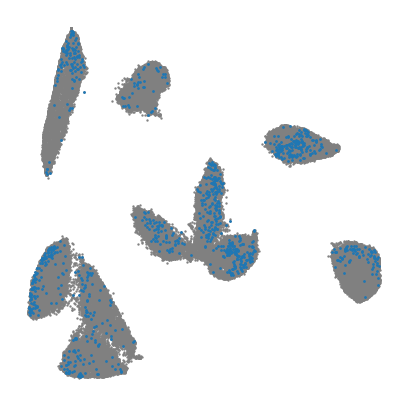

In [41]:
idx_from = 2
idx_to = 3


plt.figure(figsize=(5, 5))
plt.scatter(Z[:, 0], Z[:, 1], c="grey", s=0.5)
for i, cluster in enumerate(clusters[idx_from:idx_to]):
    print(f"Cluster {i + idx_from}: Size {len(cluster.data_indices)}")
    cluster_points = Z[cluster.data_indices]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=1.0, color=colors[i])

plt.axis("off")
plt.show()